In [7]:
import theano
import numpy as np
import pickle
from theano import tensor as T
from matplotlib import pyplot as plt

In [8]:
with open('theano_test_data.pl','r') as datafile:
    Xdata,ydata = pickle.load(datafile)

In [66]:
p = 2
H = 4
x = T.vector('x')
W1 = theano.shared(value = np.random.randn(p*H).reshape((H,p)), name= 'W1')
w2 = theano.shared(value = np.random.randn(H), name= 'w2')

In [67]:
u1 = T.dot(W1,x)

In [68]:
h = T.nnet.relu(u1)
u2 = T.dot(h,w2)
y = T.scalar('y')
prob = T.nnet.sigmoid(u2)


u3 = T.sum(T.sqr(W1))
u4 = T.sum(T.sqr(w2))
lamb = T.scalar('lambda')
pen = lamb * (u3 + u4)

L = - y * T.log(prob) - (1 - y) * T.log(1 - prob)
R = L + pen

In [69]:
w2g = T.grad(R,w2)
W1g = T.grad(R,W1)

In [70]:
learn_rate = .05

In [71]:
W_updates = [(W1, W1 - learn_rate * W1g),
            (w2, w2 - learn_rate * w2g)]

In [72]:
grad_step = theano.function([x,y,lamb],R,updates=W_updates)

In [73]:
Xdata.shape, ydata[0]

((1000L, 2L), 0.0)

In [114]:
n = Xdata.shape[0]
W1.set_value(np.random.randn(p*H).reshape((H,p)))
w2.set_value(np.random.randn(H))
lambval = 0.05
for i in range(n):
    grad_step(Xdata[i,:],ydata[i],lambval)

In [115]:
W1.get_value(), w2.get_value()

(array([[-0.00322894, -0.01719478],
        [ 0.54726048,  0.10991514],
        [-0.00307188, -0.01770449],
        [-0.00306193, -0.01651792]]),
 array([ 0.01713876, -0.5478788 ,  0.01605688,  0.01654803]))

In [116]:
yhat = T.gt(prob,.5)

In [117]:
ypred = np.array([prob.eval({x: X}) > .5 for X in Xdata])

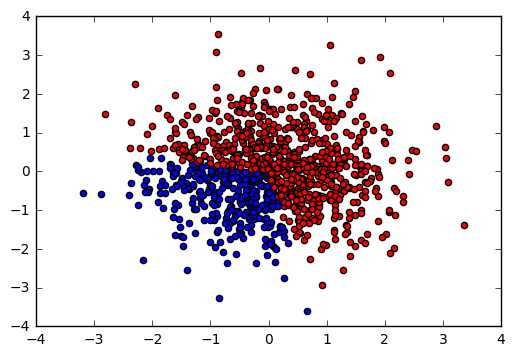

In [118]:
plt.scatter(Xdata[ypred==1.,0],Xdata[ypred==1.,1])
plt.scatter(Xdata[ypred==0.,0],Xdata[ypred==0.,1],c='r')
plt.show()